In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Mall_Customers.csv')


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
from sklearn.preprocessing import MinMaxScaler
col_names1 = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features1 = df[col_names1]
minmax = MinMaxScaler().fit(features1.values)
features1 = minmax.transform(features1.values)
maxmin_features1 = pd.DataFrame(features1, columns = col_names1)
maxmin_features1.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,0.000000,0.019231,0.387755
1,0.000000,0.057692,0.816327
2,0.008197,0.038462,0.051020
3,0.008197,0.096154,0.775510
4,0.016393,0.250000,0.397959


In [ ]:
gender = df['Gender']
newdf8 = maxmin_features1.join(gender)
newdf8= pd.get_dummies(newdf8, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
newdf8 = newdf8.drop(['Gender_Male'],axis=1)
newdf8.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,0.000000,0.019231,0.387755,0
1,0.000000,0.057692,0.816327,0
2,0.008197,0.038462,0.051020,1
3,0.008197,0.096154,0.775510,1
4,0.016393,0.250000,0.397959,1


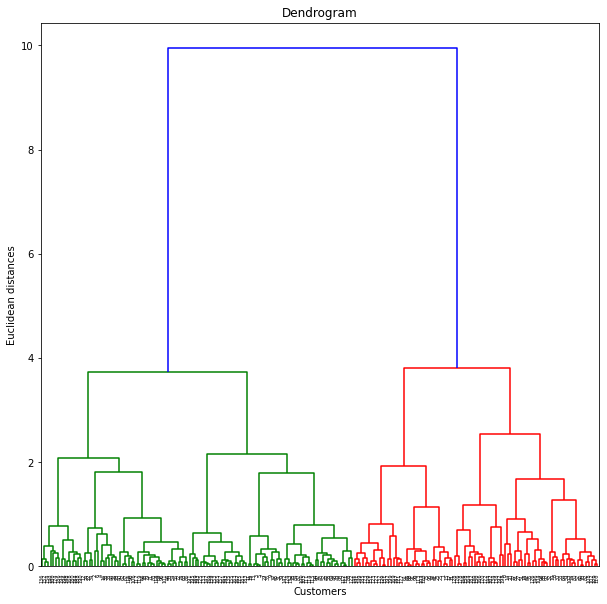

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(newdf8, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
newdf9=newdf8


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
x=[]
for cluster in range(2,10):
    AC = AgglomerativeClustering(n_clusters = cluster)
    AC.fit(newdf9)
    x.append(silhouette_score(newdf9, AC.labels_, metric='euclidean'))

Text(0, 0.5, 'Shiloutte Score')

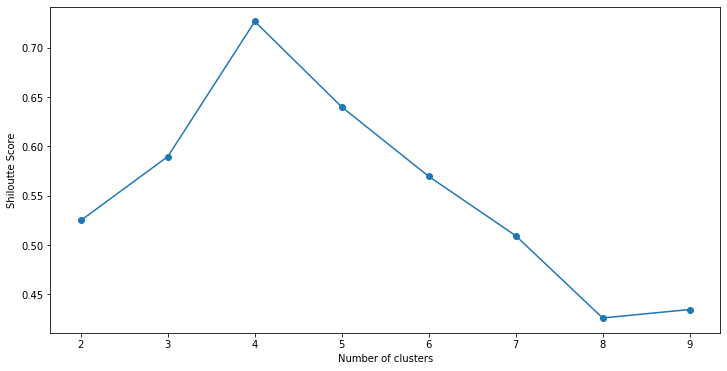

In [ ]:
frame2 = pd.DataFrame({'Cluster':range(2,10), 'Shiloutte Score':d})

frame2

plt.figure(figsize=(12,6))
plt.plot(frame2['Cluster'], frame2['Shiloutte Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Shiloutte Score')

In [ ]:
hc2= AgglomerativeClustering(n_clusters =4, affinity = 'euclidean', linkage = 'ward')
clusters3 = hc2.fit_predict(newdf9.iloc[:,1:])
newdf9["label"] = clusters3
newdf9['label'].unique()
newdf9

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female,label
0,0.000000,0.019231,0.387755,0,2
1,0.000000,0.057692,0.816327,0,2
2,0.008197,0.038462,0.051020,1,3
3,0.008197,0.096154,0.775510,1,1
4,0.016393,0.250000,0.397959,1,1
...,...,...,...,...,...
195,0.860656,0.326923,0.795918,1,1
196,0.909836,0.519231,0.275510,1,3
197,0.909836,0.269231,0.744898,0,2
198,1.000000,0.269231,0.173469,0,0


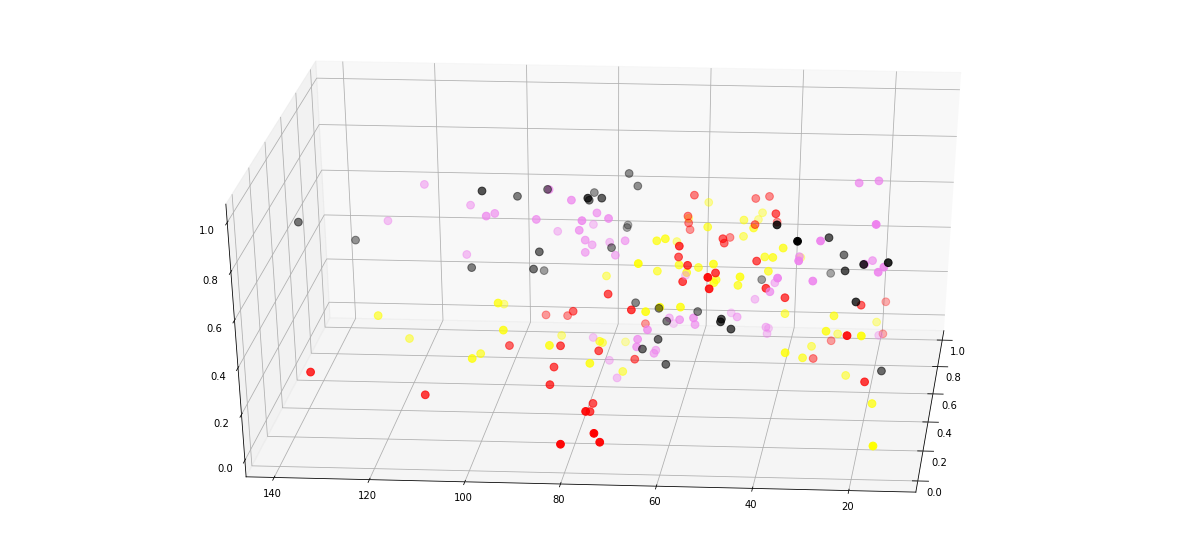

In [ ]:
fig1 = plt.figure(figsize=(21,10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(newdf9.Age[newdf9.label == 0], df["Annual Income (k$)"][newdf9.label == 0], newdf8["Spending Score (1-100)"][newdf9.label == 0], c='red', s=60)
ax1.scatter(newdf9.Age[newdf9.label == 1], df["Annual Income (k$)"][newdf9.label == 1], newdf8["Spending Score (1-100)"][newdf9.label == 1], c='violet', s=60)
ax1.scatter(newdf9.Age[newdf9.label == 2], df["Annual Income (k$)"][newdf9.label == 2], newdf8["Spending Score (1-100)"][newdf9.label == 2], c='black', s=60)
ax1.scatter(newdf9.Age[newdf9.label == 3], df["Annual Income (k$)"][newdf9.label == 3], newdf8["Spending Score (1-100)"][newdf9.label == 3], c='yellow', s=60)

ax1.view_init(30, 185)
plt.show()

No handles with labels found to put in legend.


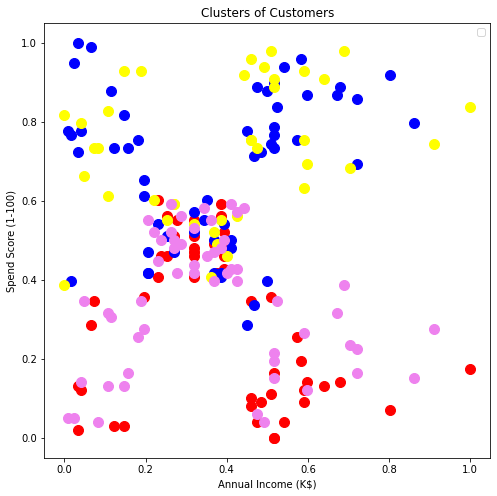

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(newdf9["Annual Income (k$)"][newdf9.label == 0],newdf9['Spending Score (1-100)'][newdf9.label == 0],  s = 100, c = 'red')
plt.scatter(newdf9["Annual Income (k$)"][newdf9.label == 1],newdf9['Spending Score (1-100)'][newdf9.label == 1], s = 100, c = 'blue')
plt.scatter(newdf9["Annual Income (k$)"][newdf9.label == 2],newdf9['Spending Score (1-100)'][newdf9.label == 2], s = 100, c = 'yellow')
plt.scatter(newdf9["Annual Income (k$)"][newdf9.label == 3],newdf9['Spending Score (1-100)'][newdf9.label == 3], s = 100, c = 'violet')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()